# This is an Example of using Xarray on the EFAS NetCDF File

First we use Xarray to Open the Dataset so we can see the contents

In [1]:
import xarray as xr

ds = xr.open_dataset('../data/clim.nc')

In [2]:
ds

<xarray.Dataset>
Dimensions:                       (x: 1000, y: 950)
Coordinates:
  * y                             (y) float64 5.498e+06 5.492e+06 ... 7.525e+05
  * x                             (x) float64 2.502e+06 2.508e+06 ... 7.498e+06
    latitude                      (y, x) float32 ...
    longitude                     (y, x) float32 ...
Data variables:
    dis24                         (y, x) float32 ...
    lambert_azimuthal_equal_area  int32 ...
    areaAll                       (y, x) int8 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-03-15T09:39:24 GRIB to CDM+CF via cfgrib-0....

We can see that the file contains X and Y, Latitude and Longitude, Information about the Lambert_Azimuthal_Equal_Area Projection and a variable called dis24. Discharge over the last 24 Hour Period.

To Access the values in the file we can simply type

<IPython.core.display.Javascript object>


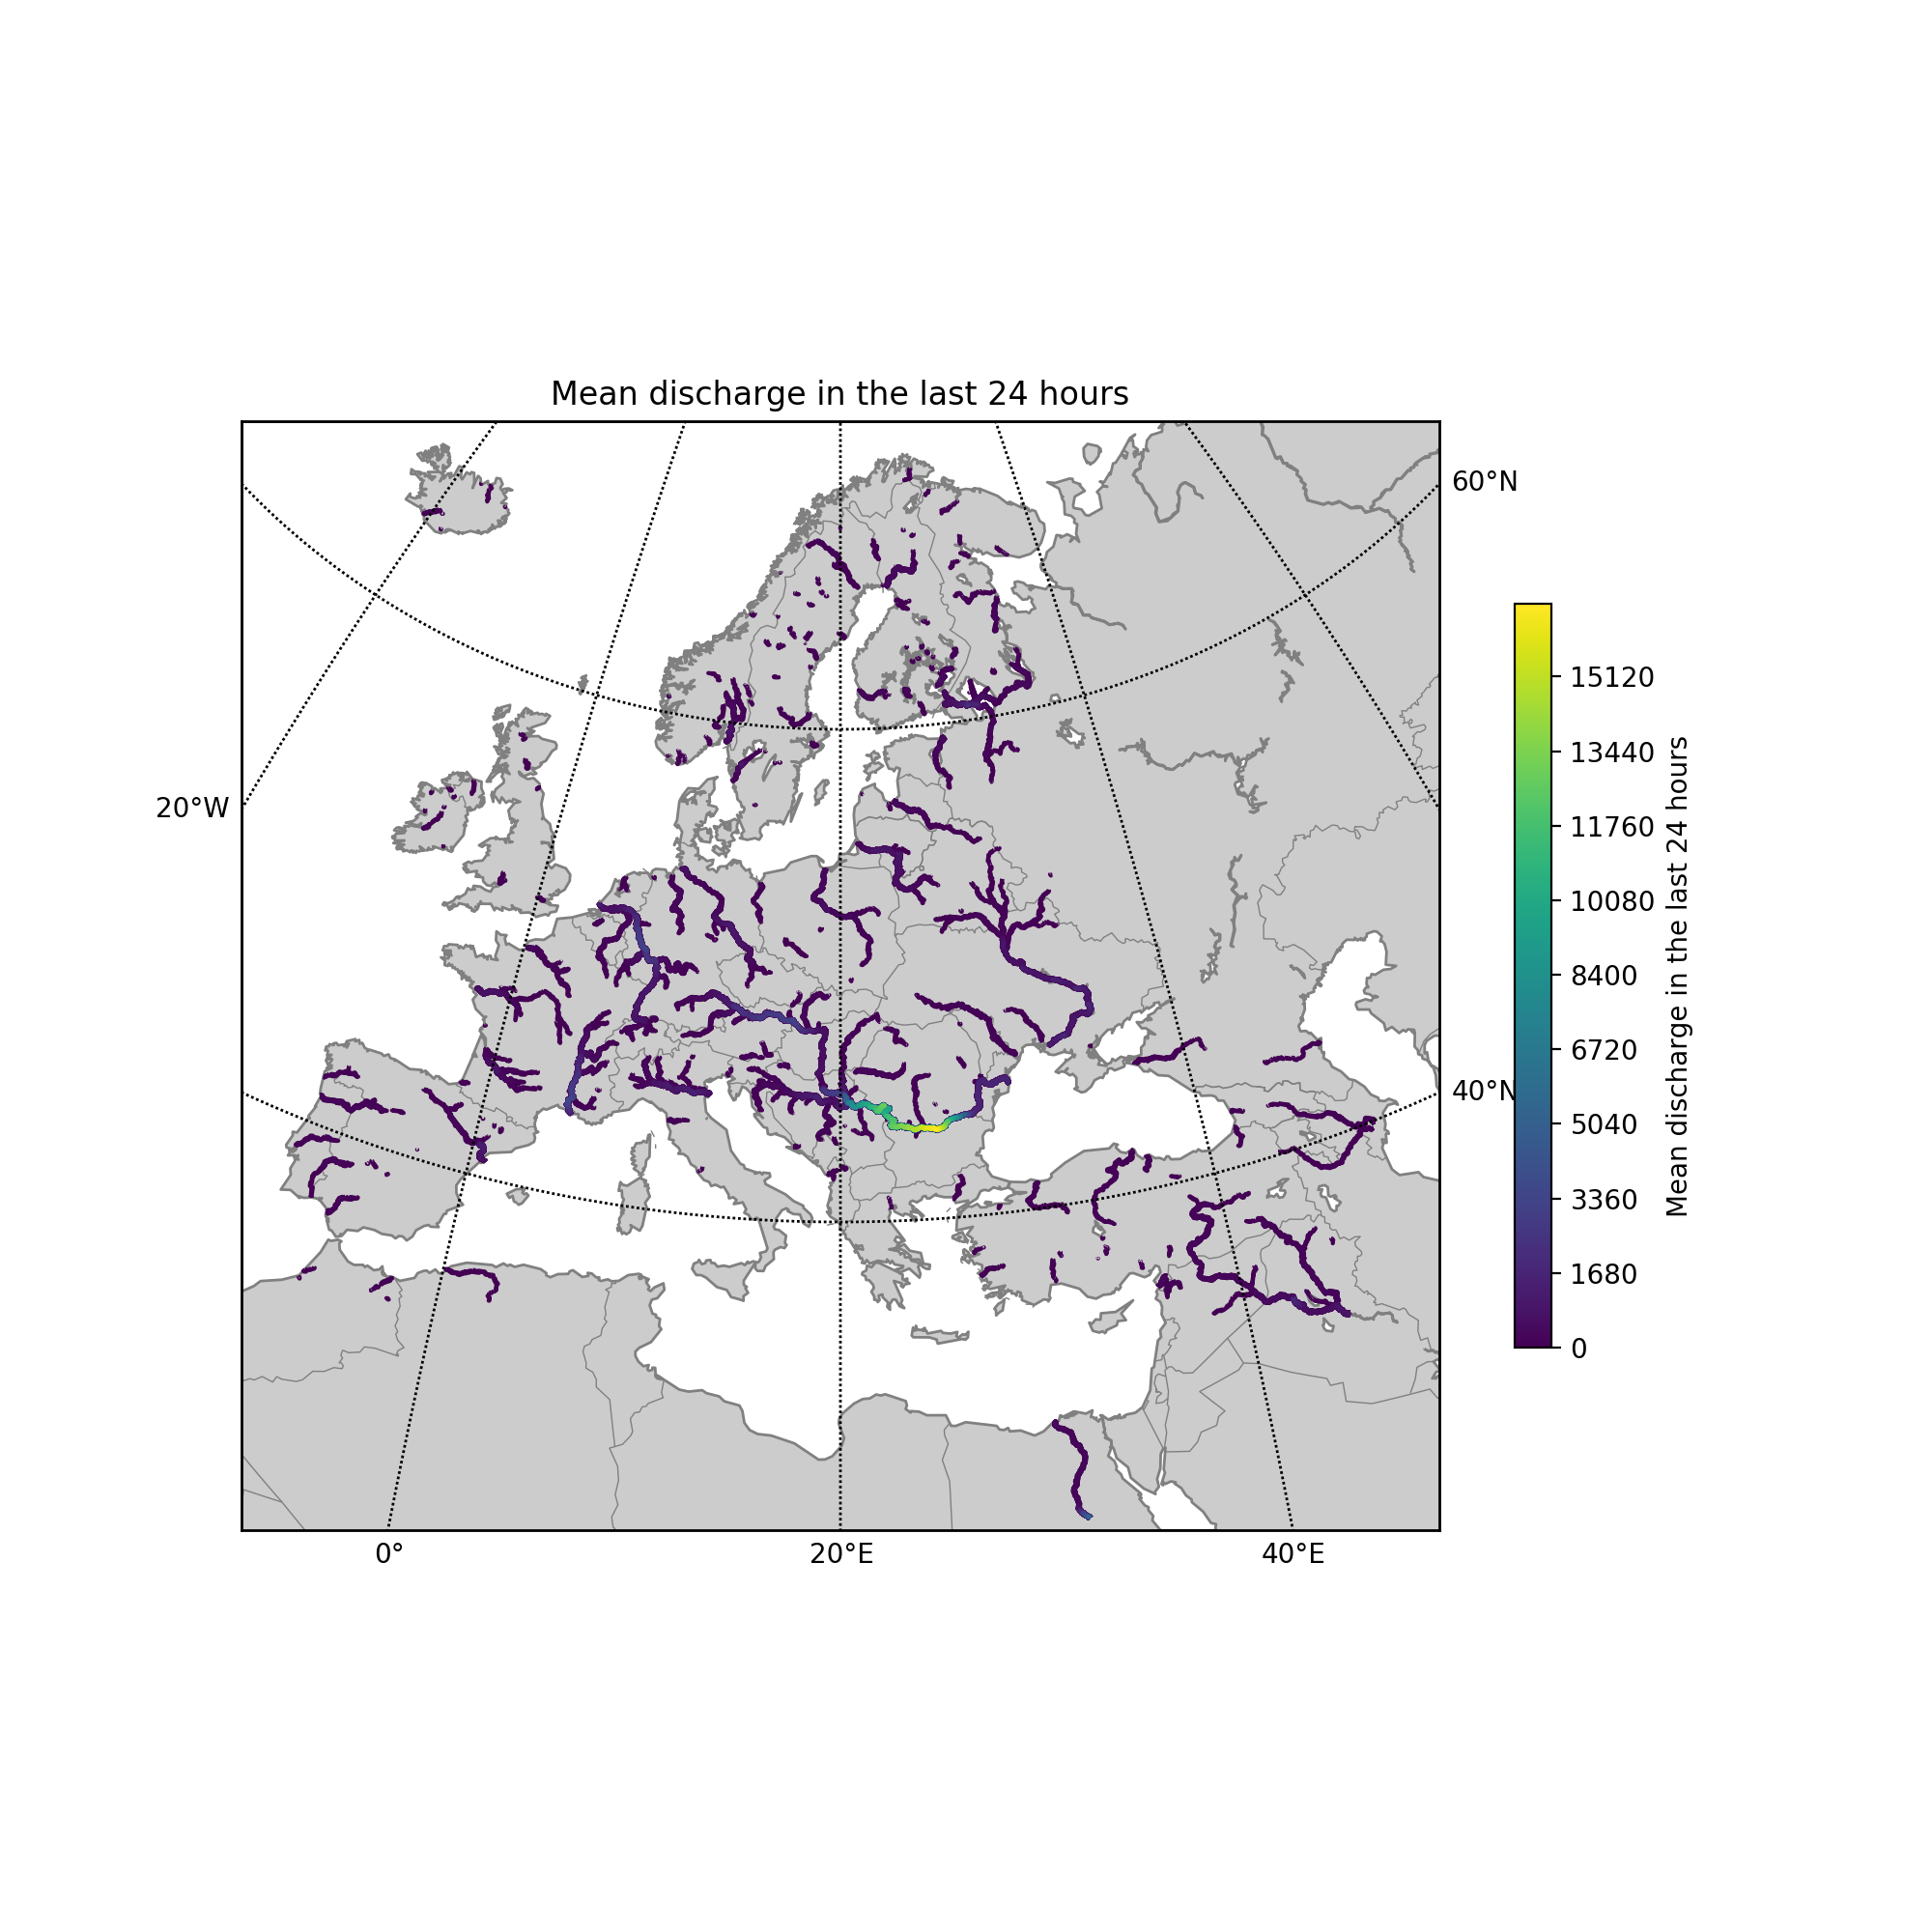

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plot
from mpl_toolkits.basemap import Basemap,cm
import numpy as np
import pandas as pd

plot.figure(figsize=(10,10),num='EFAS Data in matplotlib with Jupyter')

m = Basemap(width=5400000,height=5000000,
            resolution='l',projection='laea',\
            lat_ts=70,lat_0=50,lon_0=20.)

m.drawparallels(np.arange(-80.,81.,20.),labels=[False, True, True, False])
m.drawmeridians(np.arange(-180.,181.,20.), labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
m.drawcoastlines(color='grey')
m.drawcountries(color='grey')
m.fillcontinents()
cmap = plot.cm.get_cmap('jet')
cmap.set_under('white')
x,y=m(ds.longitude.values,ds.latitude.values)
sc = plot.contour(x,y,ds.dis24.values,500,vmin=1)
plot.title(ds.dis24.GRIB_name)
cbar = plot.colorbar(sc, shrink=.5,)
cbar.set_label(ds.dis24.GRIB_name)
#plot.show()

Which lists all the Data and Metadata about this variable.

We can also look at the values it holds